# Cogs 108 Final Project

# Overview


In this project, we intend to find out the relationships between flu infection rate in the US and three possible factors: temperate, influenza vaccination rates, and each state’s medical level. We choose to standardize and analyze the data from 2018(week 40) to 2019(week 39). By using linear regression,we intend to the relationships.

# Name

- Xiaolong Huang
- Yi Mao
- Yueqi Liao
- Shuyuan Wang
- Zehua Fu

# Research Question

Research question: what is the relationships between flu infection rate in the US and temperatures, influenza vaccination rates, and each state’s medical level?

Explanation: To be more specific, medical level measured by 1. the overall score each states’ hospital score own in one of our chosen dataset.(For example, in the dataset, there are columns stored each hospital’s patient’s experience score, timeliness of care score, and so on.) 2. The average number of patient served by state's hospital.

## Background and Prior Work

Each year, thousands people die because of the flu infection. Thus, our group is interested in finding out the relationship between flu infection rate and possible factors. we are trying to find some correlations between flu and its affects, so we could make suggestions about possible ways to reduce flu infection rate.We believe that our project will contribute to society. To be specific, our conclusion can provide government better ways to fight against flu.

Some researches show that there is a correlation of the diffusion of flu with temperatures, flu vaccination rates as well as medical levels. 
Relative research article:
1. (Temperature influence) http://sitn.hms.harvard.edu/flash/2014/the-reason-for-the-season-why-flu-strikes-in-winter/
    - Title: ‘The Reason for the Season: why flu strikes in winter’
    - Content: From the research done by Harvard University, we could know that there is a correlation of the diffusion of flu in the US with temperatures.
During winter, because of low temperature, people would more likely to stay indoors with windows sealed. In this case, it is highly possible to exchange breath with people who has flu.
Also days become shorter during winter which means that there will be less sunlight vitamin D or melatonin needed to protect human bodies.
influenza virus may survive better in lower temperature.
2. (Flu Vaccines Work and medication level) https://www.cdc.gov/flu/vaccines-work/index.html and https://www.cdc.gov/flu/prevent/benefit-publications.htm 
    - Title: ‘Flu Vaccines Work’ and 'Benefits of Influenza Vaccination: Selected Publications'
    - Content: These websites provide us information of vaccines, and prove that there is a correlation of the diffusion of flu in the US with flu vaccination rates. Websites suggest that flu vaccines help to lower the flu infection rate.

# Hypothesis

We hypothesize that temperature, flu vaccination rate and medical levels are three crucial factors affecting the flu infection rate. According to our background research and prior work, we rationally hypothesize that: 1. There is a negative correlation of the diffusion of flu in the US with temperatures. 2. There is a negative correlation of the diffusion of flu in the US with flu vaccination rates. 3. There is a negative correlation of the diffusion of flu in the US with medical levels.

Reasons for our hypothesis are as following. First, according to research, influenza virus may survive better in lower temperature, and people may stay indoor in winter which increase the possibility of influenza virus spread. Second, flu vaccination may build up people's resistance to flu. Third, better medical level may provide better medical service, which may to some extend obstruct influenza virus spread.


# Datasets
## Ideal Datasets we would need:
Our datasets should include relative data from 2018 (week 40) to 2019 (week 39).We expect to find datasets that include each state’s flu infection rate (measured by weeks), each state’s influenza vaccine rate (measured by year),each state’s medical level rate (measured by year), and each state’s average temperature (measured by months). 


## Datasets we use in this project:
1. Dataset:
    - Dataset's content: Each state's flu vaccination data (US)
    - Link to the dataset:
        https://www.cdc.gov/flu/fluvaxview/healthcare/report1819/reporti/index.html
    - Number of observations: 51
    - Information: This dataset provides each state's flu vaccination data. For our project, we use the data from 2018 to 2019.
2. Dataset:
    - Dataset's content: Influnza infection data (US)
    - Link to the dataset: 
        https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html
    - Number of observations: 2808
    - Information: This dataset provides each state hospitals' total patient number and number of patient who get flu each week.
3. Dataset:
    - Dataset's content: Average temperature data (US)
    - Link to the dataset:
        https://www.ncdc.noaa.gov/cag/statewide/time-series
    - Number of observations: 49
    - Information: This dataset provides each state's monthly temperature from 2018 to 2019.
4. Dataset:
    - Dataset's content: Points for each state's hospitals(US)
    - Link to the dataset:
        https://catalog.data.gov/dataset/hospital-general-information
    - Number of observations: 5339
    - Information: This dataset provide points earned by different hospitals. It rate hospitals from different dimentions(e.g. service, effectiveness, and so on.) Our project calculates each state hospitals's average point. We states that state with higher point means that state have higer medical level(which means can provide better medical support for patients)
    
We plan to create two dataframes. The first one, we decide to have four columns: states' name, medical level data, vaccination rate, and influenza infection rate. The second dataframe, we choose to have columns: states' name, temperature data, influenza infection rate.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import bs4
from bs4 import BeautifulSoup

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# PART1: Data Cleaning

## 1. Import flu infection Data

In [2]:
df_flu = pd.read_csv("ILINet.csv")


In [3]:
df_flu

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,Alabama,2018,40,X,1.62738,X,X,X,X,X,X,640,82,39327
1,States,Alaska,2018,40,X,1.95933,X,X,X,X,X,X,79,16,4032
2,States,Arizona,2018,40,X,1.73525,X,X,X,X,X,X,307,42,17692
3,States,Arkansas,2018,40,X,1.10452,X,X,X,X,X,X,54,14,4889
4,States,California,2018,40,X,1.48079,X,X,X,X,X,X,698,105,47137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,States,Wisconsin,2019,39,X,1.46275,X,X,X,X,X,X,291,32,19894
2804,States,Wyoming,2019,39,X,0.393185,X,X,X,X,X,X,9,10,2289
2805,States,Puerto Rico,2019,39,X,4.24545,X,X,X,X,X,X,119,8,2803
2806,States,Virgin Islands,2019,39,X,1.16189,X,X,X,X,X,X,15,6,1291


### Group the Dadafrme According to States


Since the DadaFrame directly imported from the source contains the weekly information of the rates of patients' illness that was caused by the flu accross the 50 states in the U.S.A, it is important for us to sort the data according to the state name and combine them to form a monthly/annually data.**

In [4]:
df_flu = df_flu[['REGION', 'ILITOTAL', "TOTAL PATIENTS"]]
df_flu = df_flu[df_flu.ILITOTAL != 'X']
df_flu[['ILITOTAL', 'TOTAL PATIENTS']] = df_flu[['ILITOTAL', 'TOTAL PATIENTS']].astype(str).astype(int)


df_annually = df_flu.groupby('REGION').agg('sum', inplace = True)

In [5]:
# We use reset_index() to make the index from 'REGION' to a new sequential index
df_annually = df_annually.reset_index()

In [6]:
# rename the column named REGION to State which is the same as other dataframe presenting each State.
df_annually.rename(columns={"REGION":"State"},inplace=True)

In [7]:
df_annually.head()

,State,ILITOTAL,TOTAL PATIENTS
0,Alabama,57569,1997662
1,Alaska,7436,237433
2,Arizona,22168,832328
3,Arkansas,5319,179369
4,California,47142,2243373


### Calculate the Overall Rate of Illness Caused by Flu for Each State

In [8]:
df_rate = df_annually
df_rate["RATE"] = df_annually['ILITOTAL']/df_annually['TOTAL PATIENTS']


One thing to notice for this data is that the stats of Florida is 'X', which means it is a N/A.
<br>
Therefore the rows containing the information of Florida is dropped from this dataframe.**

### Getting More Detailed Monthly flu infection Rate for Each State

Sometimes the annual flu-infection rates for each state is not enough and we need more detailed data.
<br>
This is why we are creating a more detailed monthly flu-infection rates for each state.
<br>
The annual rate is compatible with some of the data we have, while the monthly rate is consistent with others.**

In [9]:
df_monthly = df_flu

### Self-Defined Function to Get Monthly Flu-infection Rate

This function takes a state name as input.**
<br>
It returns a dataframe object that contains information about the monthly flu-infection rates of the input state.**

In [10]:
def getDf(state):
    df_tmp = df_monthly.loc[df_monthly['REGION'] == state]
    df_tmp = df_tmp.reset_index()
    length = len(df_tmp['REGION'])
    df = pd.DataFrame({'REGION': [], 'ILITOTAL':[], 'TOTAL PATIENTS':[], 'MONTH':[]})
    month_count = 0
    for i in range(0, length):
        if (i % 4 != 0):
            df.iloc[-1]['ILITOTAL'] += df_tmp.iloc[i]['ILITOTAL']
            df.iloc[-1]['TOTAL PATIENTS'] += df_tmp.iloc[i]['TOTAL PATIENTS']
        else:
            df = df.append({'REGION': state, 'ILITOTAL': df_tmp.iloc[i]['ILITOTAL'], 'TOTAL PATIENTS':
                            df_tmp.iloc[i]['TOTAL PATIENTS'], 'MONTH': month_count}, ignore_index=True)
            month_count+=1
            df.reset_index()
    df["RATE"] = df['ILITOTAL']/df['TOTAL PATIENTS']
    return df

In [11]:
state_arr = df_flu.REGION.unique()
df_map = {}
for state in state_arr:
    df_map[state] = getDf(state)

In [12]:
# This is how you get a dataframe about a state
df_map['Alabama']

,REGION,ILITOTAL,TOTAL PATIENTS,MONTH,RATE
0,Alabama,640.0,39327.0,0.0,0.016274
1,Alabama,914.0,38378.0,1.0,0.023816
2,Alabama,1263.0,41155.0,2.0,0.030689
3,Alabama,1977.0,38097.0,3.0,0.051894
4,Alabama,2168.0,39384.0,4.0,0.055048
5,Alabama,2907.0,40017.0,5.0,0.072644
6,Alabama,1305.0,35376.0,6.0,0.036889
7,Alabama,757.0,39192.0,7.0,0.019315
8,Alabama,656.0,40325.0,8.0,0.016268
9,Alabama,387.0,38300.0,9.0,0.010104


In [13]:
df_annually1= df_annually
df_annually1['ILIRATE'] = df_annually['ILITOTAL']/df_annually['TOTAL PATIENTS']
df_annually1 = df_annually[['State', 'ILIRATE']].set_index('State')
df_annually1

,ILIRATE
State,
Alabama,0.028818
Alaska,0.031318
Arizona,0.026634
Arkansas,0.029654
California,0.021014
Colorado,0.032616
Connecticut,0.032159
Delaware,0.005620
District of Columbia,0.020450


In [14]:
df_annually1 = df_annually1.drop(index=['Virgin Islands', 'Puerto Rico', 'Hawaii', 'District of Columbia', 'New York City'])
df_annually1

,ILIRATE
State,
Alabama,0.028818
Alaska,0.031318
Arizona,0.026634
Arkansas,0.029654
California,0.021014
Colorado,0.032616
Connecticut,0.032159
Delaware,0.005620
Georgia,0.030618


In [15]:
# rename the column named REGION to State which is the same as other dataframe presenting each State.
df_annually.rename(columns={"REGION":"State"},inplace=True)

In [16]:
df_annually.head()

,State,ILITOTAL,TOTAL PATIENTS,RATE,ILIRATE
0,Alabama,57569,1997662,0.028818,0.028818
1,Alaska,7436,237433,0.031318,0.031318
2,Arizona,22168,832328,0.026634,0.026634
3,Arkansas,5319,179369,0.029654,0.029654
4,California,47142,2243373,0.021014,0.021014


## 2. Clean Data of Hospitals in the US
Import the data of all hospitals in the US. 

In [17]:
df_hospital=pd.read_csv("Hospital_General_Information.csv")
df_hospital

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,031309,SAGE MEMORIAL HOSPITAL,STATE ROUTE 264 SOUTH 191,GANADO,AZ,86505,APACHE,(928) 755-4541,Critical Access Hospitals,Voluntary non-profit - Private,...,5.0,Not Available,16.0,Not Available,16.0,Not Available,5.0,Not Available,5.0,NaN
1,044021,WOODRIDGE BEHAVIORAL CENTER,600 NORTH 7TH STREET,WEST MEMPHIS,AR,72301,CRITTENDEN,(870) 394-4113,Psychiatric,Proprietary,...,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,POINT (-90.175858 35.152962)
2,100277,DOUGLAS GARDENS HOSPITAL,5200 NE 2ND AVE,MIAMI,FL,33137,MIAMI-DADE,(305) 751-8626,Acute Care Hospitals,Voluntary non-profit - Private,...,5.0,Not Available,16.0,Not Available,5.0,Not Available,16.0,Not Available,16.0,POINT (-80.191767 25.822972)
3,104078,SUNCOAST BEHAVIORAL HEALTH CENTER,4480 51ST ST W,BRADENTON,FL,34210,MANATEE,(941) 792-2222,Psychiatric,Proprietary,...,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,POINT (-82.612355 27.460155)
4,130063,TREASURE VALLEY HOSPITAL,8800 WEST EMERALD STREET,BOISE,ID,83704,ADA,(208) 373-5000,Acute Care Hospitals,Proprietary,...,5.0,Above the national average,NaN,Not Available,5.0,Not Available,16.0,Not Available,16.0,POINT (-116.290332 43.611289)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,180016,JEWISH HOSPITAL - SHELBYVILLE,727 HOSPITAL DRIVE,SHELBYVILLE,KY,40065,SHELBY,(502) 647-4300,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,POINT (-85.236145 38.208808)
5335,363306,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,MONTGOMERY,(937) 641-3450,Childrens,Voluntary non-profit - Private,...,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,NaN
5336,454008,NORTH TEXAS STATE HOSPITAL,6515 KEMP BLVD,WICHITA FALLS,TX,76308,WICHITA,(940) 692-1220,Psychiatric,Government - State,...,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,POINT (-98.527677 33.840213)
5337,100266,GULF BREEZE HOSPITAL,1110 GULF BREEZE PKWY,GULF BREEZE,FL,32561,SANTA ROSA,(850) 934-2000,Acute Care Hospitals,Voluntary non-profit - Other,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,POINT (-87.156803 30.358649)


Since we observs that the state column only includes the abbreviations of each state, we want to replace them with the actual names of each state. Hence, we store the abbreviations and names into a dictionary to replace the state column later. 

In [18]:
states = {
    'AL' : 'Alabama',
    'AK' : 'Alaska',
    'AZ' : 'Arizona',
    'AR' : 'Arkansas',
    'CA' : 'California',
    'CO' : 'Colorado',
    'CT' : 'Connecticut',
    'DE' : 'Delaware',
    'FL' : 'Florida',
    'GA' : 'Georgia',
    'HI' : 'Hawaii',
    'ID' : 'Idaho',
    'IL' : 'Illinois',
    'IN' : 'Indiana',
    'IA' : 'Iowa',
    'KS' : 'Kansas',
    'KY' : 'Kentucky',
    'LA' : 'Louisiana',
    'ME' : 'Maine',
    'MD' : 'Maryland',
    'MA' : 'Massachusetts',
    'MI' : 'Michigan',
    'MN' : 'Minnesota',
    'MS' : 'Mississippi',
    'MO' : 'Missouri',
    'MT' : 'Montana',
    'NE' : 'Nebraska',
    'NV' : 'Nevada',
    'NH' : 'New Hampshire',
    'NJ' : 'New Jersey',
    'NM' : 'New Mexico',
    'NY' : 'New York',
    'NC' : 'North Carolina',
    'ND' : 'North Dakota',
    'OH' : 'Ohio',
    'OK' : 'Oklahoma',
    'OR' : 'Oregon',
    'PA' : 'Pennsylvania',
    'RI' : 'Rhode Island',
    'SC' : 'South Carolina',
    'SD' : 'South Dakota',
    'TN' : 'Tennessee',
    'TX' : 'Texas',
    'UT' : 'Utah',
    'VT' : 'Vermont',
    'VA' : 'Virginia',
    'WA' : 'Washington',
    'WV' : 'West Virginia',
    'WI' : 'Wisconsin',
    'WY' : 'Wyoming',
    'DC' : 'District of Columbia',
    'PR' : 'Puerto Rico',
    'VI' : 'Virgin Islands',
}

We observe that the ratings of some hospitals are missing, so we should consider both the number of hospitals in each state and the average overall ratings of hospitals. We first remove all the rows with missing ratings and find the average ratings of each state. Then we append a column with each states total number of hospitals.

In [19]:
df_hospital = df_hospital[['State', 'Hospital overall rating']]
df_rhospital = df_hospital[df_hospital['Hospital overall rating'] != 'Not Available']
df_rhospital['Hospital overall rating'] = df_rhospital['Hospital overall rating'].astype(int)
df_rhospital = df_rhospital.groupby('State').agg({'Hospital overall rating':'mean'}).reset_index()
df_rhospital = df_rhospital.rename(columns={'Hospital overall rating' : 'Average hospital overall rating'})


In [20]:
#add new column named number of hospitals
df_chospital = df_hospital.pivot_table(index='State', aggfunc='size').rename('Number of hospitals').reset_index()
df_hospital = df_rhospital.merge(df_chospital)


The last step of cleaning the data is to replace all the abbreviations with names of states.
Hospital dataframe contains columns States' full names, Average hispotal overall rate as weel as Number of hospitals.

- this hospital dataframe contains three columns: States' full names, Average hospital overall rating and Number of hospitals. The reason we contains two columns to present the levels of hospital is to avoid bias, since average hispotal overall rating 

In [21]:

df_hospital = df_hospital.replace({'State': states}).sort_values(by=['State'])
df_hospital

,State,Average hospital overall rating,Number of hospitals
1,Alabama,3.039474,97
0,Alaska,3.400000,26
3,Arizona,3.072727,94
2,Arkansas,2.806452,86
4,California,2.993031,383
5,Colorado,3.900000,91
6,Connecticut,2.964286,37
8,Delaware,2.666667,12
7,District of Columbia,1.833333,9
9,Florida,2.710059,211


## 3. Temperature dataset

In [22]:
df_temp=pd.read_csv('temperature_data.csv')
df_temp = df_temp.drop('Date',axis=1)

In [23]:
state_arr = df_flu.REGION.unique()
df_map = {}
for state in state_arr:
    df_map[state] = getDf(state)

In [24]:
df_temp = df_temp.T
# Change the column name, to formulate the dataframe. The average temperature for each State from 2018-01 to 2019-01

df_temp.columns = ['201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910']
df_temp

,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,...,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910
Alabama,40.4,58.0,55.4,59.5,74.4,79.3,80.7,79.5,79.4,67.4,...,46.4,56.0,54.9,63.4,74.1,78.0,80.4,80.3,80.1,67.6
Alaska,6.7,12.6,18.0,26.8,39.4,50.0,55.6,49.6,44.3,33.8,...,7.7,15.5,26.5,28.4,43.0,54.0,58.2,51.6,44.4,30.8
Arizona,47.6,46.7,52.3,62.9,68.5,78.6,82.3,80.2,76.0,59.9,...,42.4,40.9,51.7,60.2,60.8,75.2,81.8,81.8,73.8,60.0
Arkansas,35.7,45.9,53.9,55.2,75.0,80.1,81.8,78.8,75.0,62.6,...,40.8,46.0,48.9,60.8,70.6,75.6,79.0,80.3,79.8,60.8
California,48.9,46.6,49.0,57.2,63.0,71.4,79.6,76.4,71.1,60.9,...,46.0,40.6,48.8,58.2,58.5,71.1,75.5,76.8,68.9,58.7
Colorado,29.7,28.6,37.8,44.0,57.2,66.5,70.0,66.2,61.9,45.0,...,25.9,24.9,33.7,45.5,47.9,60.6,69.1,68.3,62.9,40.9
Connecticut,25.4,35.7,36.4,43.4,62.2,66.4,74.0,74.3,66.1,52.3,...,27.2,30.3,35.2,49.2,57.1,66.6,75.0,70.7,63.2,53.7
Delaware,32.8,43.2,40.5,51.6,68.3,72.6,77.2,78.6,73.6,60.2,...,35.2,38.7,43.3,58.8,67.0,73.8,79.8,76.5,71.8,61.6
Florida,55.0,69.2,63.0,70.2,76.4,81.5,82.4,82.2,82.4,76.5,...,58.4,67.5,65.7,71.2,78.8,82.3,82.8,82.9,81.9,77.8
Georgia,42.5,59.2,54.5,60.6,73.7,79.3,80.2,79.4,79.8,68.4,...,48.2,56.1,56.3,64.6,75.7,78.2,81.0,80.8,79.2,69.7


We dropped the months that is not in our infection dataset. This is because we want the months to match. We then dropped an extra month since the temperature of the same month in different years are almost identical. 

In [25]:
df_temp = df_temp[['201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909']]
df_temp

,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909
Alabama,67.4,50.4,49.0,46.4,56.0,54.9,63.4,74.1,78.0,80.4,80.3,80.1
Alaska,33.8,19.1,9.1,7.7,15.5,26.5,28.4,43.0,54.0,58.2,51.6,44.4
Arizona,59.9,49.4,42.8,42.4,40.9,51.7,60.2,60.8,75.2,81.8,81.8,73.8
Arkansas,62.6,45.8,44.2,40.8,46.0,48.9,60.8,70.6,75.6,79.0,80.3,79.8
California,60.9,52.6,44.8,46.0,40.6,48.8,58.2,58.5,71.1,75.5,76.8,68.9
Colorado,45.0,32.5,26.6,25.9,24.9,33.7,45.5,47.9,60.6,69.1,68.3,62.9
Connecticut,52.3,39.1,33.8,27.2,30.3,35.2,49.2,57.1,66.6,75.0,70.7,63.2
Delaware,60.2,45.7,41.4,35.2,38.7,43.3,58.8,67.0,73.8,79.8,76.5,71.8
Florida,76.5,66.7,61.8,58.4,67.5,65.7,71.2,78.8,82.3,82.8,82.9,81.9
Georgia,68.4,53.2,50.2,48.2,56.1,56.3,64.6,75.7,78.2,81.0,80.8,79.2


In [26]:
df_temp = df_temp.drop(index='Florida')
df_temp

,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909
Alabama,67.4,50.4,49.0,46.4,56.0,54.9,63.4,74.1,78.0,80.4,80.3,80.1
Alaska,33.8,19.1,9.1,7.7,15.5,26.5,28.4,43.0,54.0,58.2,51.6,44.4
Arizona,59.9,49.4,42.8,42.4,40.9,51.7,60.2,60.8,75.2,81.8,81.8,73.8
Arkansas,62.6,45.8,44.2,40.8,46.0,48.9,60.8,70.6,75.6,79.0,80.3,79.8
California,60.9,52.6,44.8,46.0,40.6,48.8,58.2,58.5,71.1,75.5,76.8,68.9
Colorado,45.0,32.5,26.6,25.9,24.9,33.7,45.5,47.9,60.6,69.1,68.3,62.9
Connecticut,52.3,39.1,33.8,27.2,30.3,35.2,49.2,57.1,66.6,75.0,70.7,63.2
Delaware,60.2,45.7,41.4,35.2,38.7,43.3,58.8,67.0,73.8,79.8,76.5,71.8
Georgia,68.4,53.2,50.2,48.2,56.1,56.3,64.6,75.7,78.2,81.0,80.8,79.2
Idaho,44.0,32.0,24.3,24.3,23.2,32.4,42.9,49.8,57.2,65.5,65.9,54.9


Calculate the mean of the temperature of each month to get the average temperature of the year.

In [27]:
df_year_temp = df_temp.mean(axis=1).to_frame(name='Temperature')
df_year_temp

,Temperature
Alabama,65.033333
Alaska,32.608333
Arizona,60.058333
Arkansas,61.200000
California,58.558333
Colorado,45.241667
Connecticut,49.975000
Delaware,57.683333
Georgia,65.991667
Idaho,43.033333


## 4. Vaccination Rate

In [28]:
df_vacc= pd.read_csv('vrates.csv')

- this dataframe contains full name of State and the vaccination rate and population of each States.

In [29]:
df_vacc.head()

,State,vaccinationRate,Pop
0,Alaska,74.2,734002
1,Missouri,75.5,6169270
2,Wyoming,76.9,567025
3,Colorado,77.3,5845526
4,Oklahoma,77.6,3954821


# PART2: Exploratory Data Analysis

In [30]:
df_hospital.head()

,State,Average hospital overall rating,Number of hospitals
1,Alabama,3.039474,97
0,Alaska,3.400000,26
3,Arizona,3.072727,94
2,Arkansas,2.806452,86
4,California,2.993031,383


In [31]:
df_hospital.shape

(53, 3)

In [32]:
df_vacc.head()

,State,vaccinationRate,Pop
0,Alaska,74.2,734002
1,Missouri,75.5,6169270
2,Wyoming,76.9,567025
3,Colorado,77.3,5845526
4,Oklahoma,77.6,3954821


In [33]:
df_vacc.shape

(51, 3)

In [34]:
df_annually.head()

,State,ILITOTAL,TOTAL PATIENTS,RATE,ILIRATE
0,Alabama,57569,1997662,0.028818,0.028818
1,Alaska,7436,237433,0.031318,0.031318
2,Arizona,22168,832328,0.026634,0.026634
3,Arkansas,5319,179369,0.029654,0.029654
4,California,47142,2243373,0.021014,0.021014


In [35]:
df_annually.shape

(53, 5)

In [36]:
# join flu dataframe and medical level dataframe on the same column State.
hos_flu=df_annually.merge(df_hospital,on='State')

In [37]:
vacc_hos=hos_flu.merge(df_vacc,on='State')

### finalized attributes

- Here we create a combined table having seven attributes. State name, the population of corresponded state, the total number of illness caused by flue in a year, and the total number of patients in a year, the total number of hospitals, the avg hospital rate in this state, vaccination rate among people.

In [38]:
vacc_hos.head()

,State,ILITOTAL,TOTAL PATIENTS,RATE,ILIRATE,Average hospital overall rating,Number of hospitals,vaccinationRate,Pop
0,Alabama,57569,1997662,0.028818,0.028818,3.039474,97,81.2,4908621
1,Alaska,7436,237433,0.031318,0.031318,3.400000,26,74.2,734002
2,Arizona,22168,832328,0.026634,0.026634,3.072727,94,81.0,7378494
3,Arkansas,5319,179369,0.029654,0.029654,2.806452,86,79.4,3038999
4,California,47142,2243373,0.021014,0.021014,2.993031,383,80.9,39937489


## 1. Correlation between flu infection rate and each state’s medical level

### processing
- In order to find the correlation between flu infection rate and the medical level of the states, we would like to consider the population of the states,total patients, the total number of the hospital, avg hospital rating and all the flu cases.
- Other than considering the Average hospital overall rating, we would like to create a new column to calculate how many population per hospital serving within a State and consider this factor which could affect the flu infection rate.
- In this case, the new table will be created with new columns
    - flu_inf_rate=ILITOTAL/Pop
    - serving= TOTAL PATIENTS/ Number of hospitals
    - score= Average hospital overall rating
        

In [39]:
flu_ml=pd.DataFrame()
flu_ml['flu_inf_rate'] =vacc_hos['ILITOTAL']/vacc_hos['Pop']
flu_ml['serving']=vacc_hos['TOTAL PATIENTS']/vacc_hos['Number of hospitals']
flu_ml['score']=vacc_hos['Average hospital overall rating']

In [40]:
flu_ml.head()

,flu_inf_rate,serving,score
0,0.011728,20594.453608,3.039474
1,0.010131,9132.038462,3.400000
2,0.003004,8854.553191,3.072727
3,0.001750,2085.686047,2.806452
4,0.001180,5857.370757,2.993031


### goal:
- Based on 'serving' and 'score', we want to try our best avoiding bias to analysis the correlation between medical level and flu infection rate

### step1: Data Visualization

#### try1: line graph

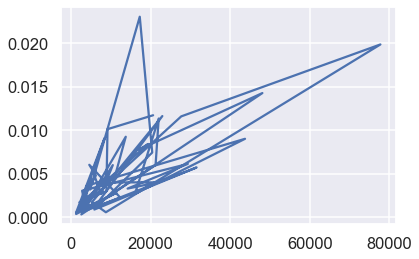

In [41]:
f1 = plt.figure()
x=flu_ml['flu_inf_rate']
y1=flu_ml['serving']
y2=flu_ml['score']
plt.plot(y1,x)
# Here presents line graph of flu infection rate and the number of patients serving per hospital')
# X_axis is the rate of flu infection
# y_axis is the the number of patients serving per hospital.

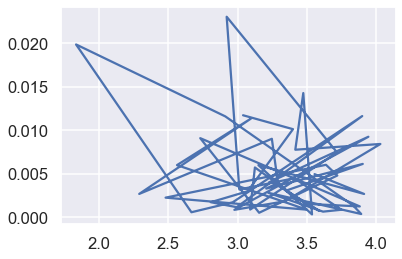

In [42]:
f2 = plt.figure()
plt.plot(y2,x)
# Here presents line graph of flu infection rate and the avg score of overall hospital
# X_axis is the rate of flu infection
# y_axis is the avg score of overall hospital.

- Thoughts

However, based on line graph, we cant really see the correlation between these factore. What we can see from the graphs above are that when the hospital serving less patients, the flue infection rate is lower and most of the hospital rating is in the range 3.0-3.6 and if the rate of the hospital rate is above 3.5, the rate of flu infection stayed to be low. From this first step, we set up our initial believe that the less per hospital serving the less flu infection rate this state will be and the more avg score of the overall hospitals is the less flu infected rates are. 
- we need further explorations

#### try2: scatter plot

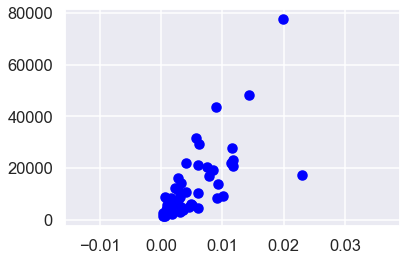

In [114]:
x=flu_ml['flu_inf_rate']
y1=flu_ml['serving']
y2=flu_ml['score']
# Plot the first set of data
f3=plt.scatter(x, y1, c='blue',)
# Here presents scatter plot of flu infection rate and the number of patients serving per hospital')
# X_axis is the rate of flu infection
# y_axis is the the number of patients serving per hospital.


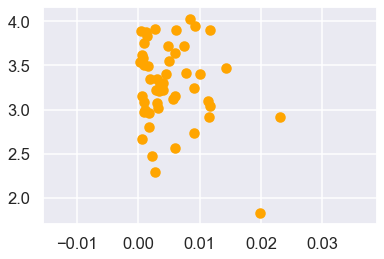

In [44]:
f4=plt.scatter(x, y2, c='orange')
# Here presents scatter plot of flu infection rate and the avg score of overall hospital
# X_axis is the rate of flu infection
# y_axis is the avg score of overall hospital.

- Thoughts

From the scatter plot of flu infection rate and the number of patients serving per hospital, we can guess there exists  positive linear relationship between these two factors. While in the scatter plot of flu infection rate and the avg score of overall hospital, we need to further explor their relationship. However, using scatter plot, we could more easily see that where the point are more clustered. in the f3, we could see that most of the hospital serving less than 2000 patients which correspondly, a really low score of flu infection rate. In the f4, we can more clearly to see that if the score is above 3, this state will not have flu infection rate more than 0.02. The result we get is the same as the first try, our direction is in the right way.

### step2: Distribution

In this step, we want to check what kind of probability distribution our data sample appears to follow. Therefore, we might could set function on our dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f7f4310>,
      dtype=object)

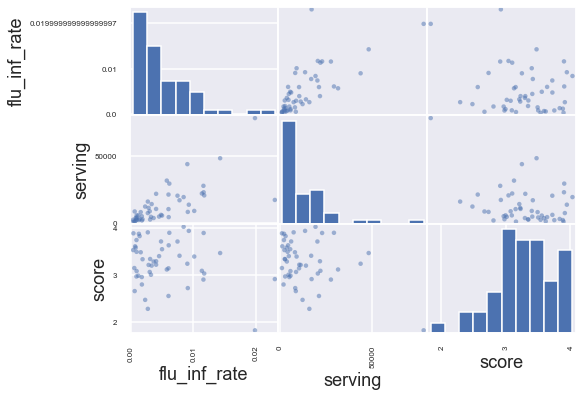

In [45]:
pd.plotting.scatter_matrix(flu_ml,figsize=(8,6))

- Thoughts

From the plot matrix, we can see that the distribution of 'flu_inf_rate' and'serving' looks like gamma distribution and 'score' distribution is more likely to be right skewed distribution.

### Step3 : Basic Analysis

In [46]:
# Use the describe pandas method to check a descriptive summary of the data.
flu_ml.describe()

,flu_inf_rate,serving,score
count,50.000000,50.000000,50.000000
mean,0.005225,13201.107986,3.283658
std,0.004994,14162.634689,0.462512
min,0.000349,1222.317073,1.833333
25%,0.001430,3969.047682,3.019362
50%,0.003470,8555.642157,3.297059
75%,0.007693,18822.959767,3.610099
max,0.023032,77739.777778,4.031250


The box plots above could help us to see the describe of the dataframe more directly.

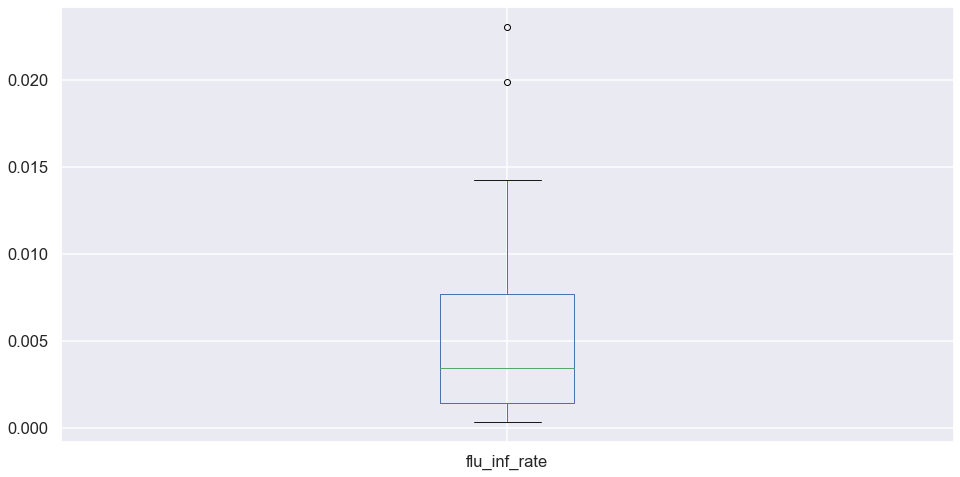

In [47]:
flu_ml['flu_inf_rate'].plot(kind='box', figsize=[16,8])

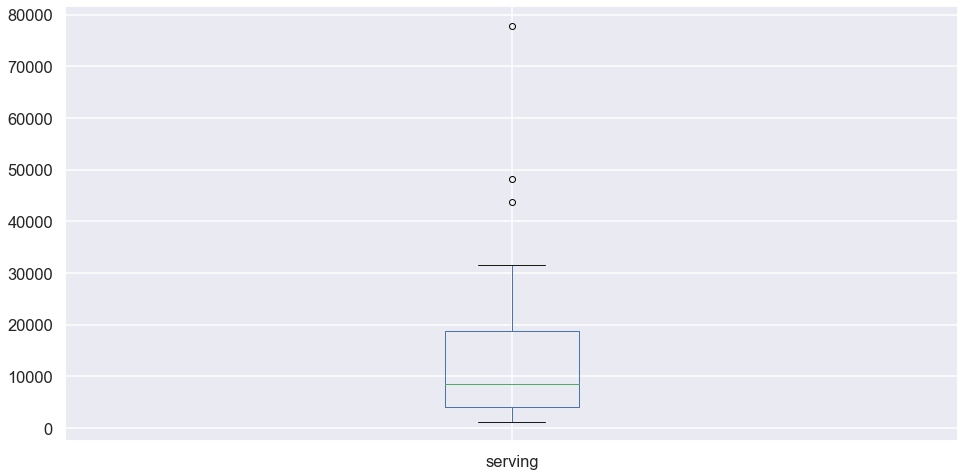

In [48]:
flu_ml['serving'].plot(kind='box', figsize=[16,8])

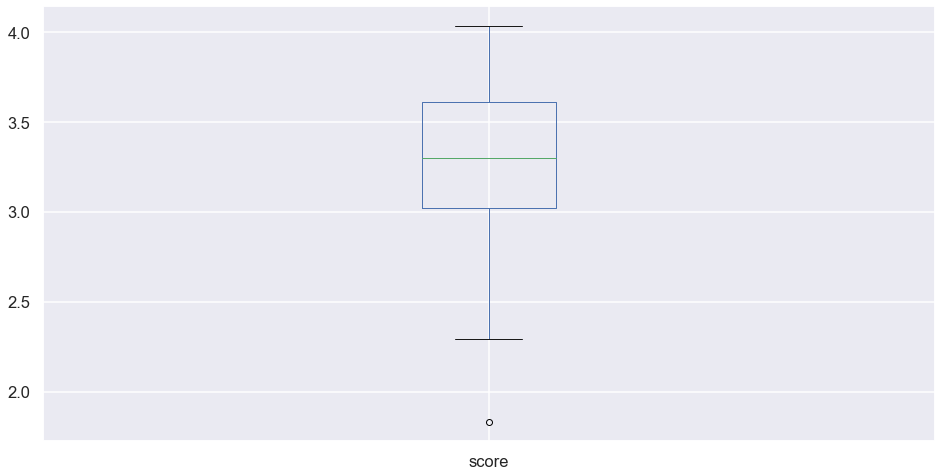

In [49]:
flu_ml['score'].plot(kind='box', figsize=[16,8])

In [50]:
corrs=flu_ml.corr()
corrs

,flu_inf_rate,serving,score
flu_inf_rate,1.000000,0.718209,-0.212741
serving,0.718209,1.000000,-0.344729
score,-0.212741,-0.344729,1.000000


From the correlation dataframe showing above, we can see that these factors are highly correlated to each other! The number of patients serving per hospital with states has more correlation to the flu infection rate than the avg score rate of overall hospitals. In this case, we can proposed that the number of patients serving per hospital could more present the medical level of this state. However, although the correlation score between 'score' and 'clu_inf_rate' is lower, this score is extremely credible that could prove what we proposed above: the higher score, the lower the flu infection rate is.

### step4: Test Distribution

In [51]:
avg_score=flu_ml['score'].values

In [52]:
st_co = normaltest(avg_score)[0]
p_co = normaltest(avg_score)[1]
st_co,p_co

(5.6425191481670876, 0.05953091187164692)

Have a look at the values returned. 

Based on these results, and using an alpha significance value of 0.01:

Set boolean values (`True`, `False`) of whether each distribution can be considered to be normally distributed. In the result we get above, we could see that avg_score failed to reject null, so it's true that it is a normally distributed.

Text(0, 0.5, 'density')

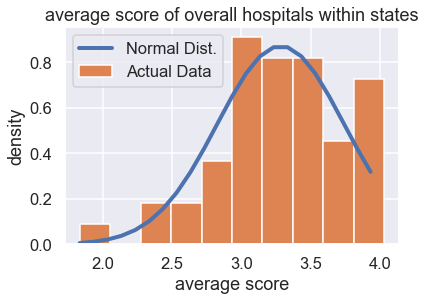

In [53]:
xs = np.arange(avg_score.min(), avg_score.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(avg_score), np.std(avg_score))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(avg_score, density = True, label = 'Actual Data');
plt.title('average score of overall hospitals within states')
plt.legend();
plt.xlabel('average score')
plt.ylabel('density')

The graph above proved that we proposed in part2 that the 'score' colomn is normally distributed.

### step5: Prediction

Based on what we found (in step1, we see that there's linear relationship between 'flu_inf_rate' and 'serving'), we could like to build a model to predict the data that we don't have.

In [54]:
a1,b1 = np.polyfit(flu_ml['serving'], flu_ml['flu_inf_rate'], 1)
a1,b1

(2.532377169706174e-07, 0.0018820801710314585)

Based on the linear model we established, we could like to predict the infection rate by using the serving number. For example, what is the infection rate if the serving number is 4000?

In [55]:
pred_=a1 * 4000 + b1
pred_

0.0028950310389139282

Now, we want to see if this model match our dataset

In [56]:
pred_ary = []
for i in np.arange(0,80000,100):
    pred_ary.append(a1 * i + b1)
pred_2 = np.array(pred_ary)

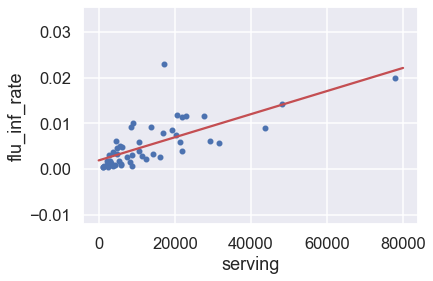

In [57]:
flu_ml.plot.scatter(x='serving',y='flu_inf_rate',color='b')
plt.plot(np.arange(0,80000,100),pred_2,'r')


### step6: Data Analysis
- From the linear regession model we established

In [58]:
outcome_1, predictors_1 = patsy.dmatrices('flu_inf_rate ~ serving+score', flu_ml)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [59]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           flu_inf_rate   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     25.17
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           3.70e-08
Time:                        16:19:57   Log-Likelihood:                 212.74
No. Observations:                  50   AIC:                            -419.5
Df Residuals:                      47   BIC:                            -413.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.004      0.103      0.9

### step7: Conclusion
- From all we analyzed above, we could get our conclusion for correlation between flu infection rate and medical leve. We first choose two factors to present medical level in case of bias -- 'serving' and 'score' (explained above). In the beginning, we believe that score is more important to scale medical level. However, as we analysis further, we figured out that 'serving' is the one could present linear relationship with flu infection rate. How we get this conclusion? First, in the step2: Distribution, we figured out that score is distributed as two other factors. Then in the step3,after we saw the describes of each columns, we try to see their correlation-- it shows that although the coefficient score between 'score' and 'flu_inf_rate' is lower than the correlation score between 'serving' and 'flu_inf_rate', such '0.02' cannot be ignored. Based on this thoughts, we set p value = 0.01. In step6, we established linear regression model to prove our thought: set null hypothesis as no linear relationship. Since p value of serving is smaller than 0.01, there is a positive linear relationship between serving and influenza infection rate. At the same time, since p value of score is larger than 0.01, there is no linear relationship between score and influenza infection rate.

# 2. Correlation between flu infection rate and influenza vaccination rate

### processing
- In order to find the correlation between flu infection rate and the influenza vaccination rate, we would like to consider the total patients, flu cases and vaccination rate.
- In this case, the new table will be created with new columns
    - flu_inf_rate=ILITOTAL/Pop
    - vac_r=VaccinationRate
        

In [60]:
flu_vac=pd.DataFrame()
flu_vac['flu_inf_rate'] =vacc_hos['ILITOTAL']/vacc_hos['Pop']
flu_vac['vac_r']=vacc_hos['vaccinationRate']



In [61]:
flu_vac.head()

,flu_inf_rate,vac_r
0,0.011728,81.2
1,0.010131,74.2
2,0.003004,81.0
3,0.001750,79.4
4,0.001180,80.9


### goal:
- Based on the flu rate and corresponded vaccination rate for the same state, we could like to find correlation between these two factors.

### step1: Data Visualization

#### try1: line graph

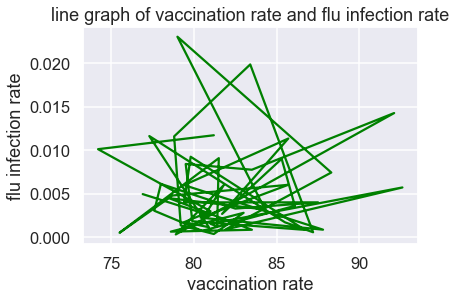

In [62]:
x=flu_vac['vac_r']
y=flu_vac['flu_inf_rate']
plt.title('line graph of vaccination rate and flu infection rate')
plt.xlabel('vaccination rate')
plt.ylabel('flu infection rate')
plt.plot(x,y,c='green')
# Here presents line graph of vaccination rate and flu infection rate
# X_axis is the vaccination rate
# y_axis is the flu infection rate

#### try2: scatter plot

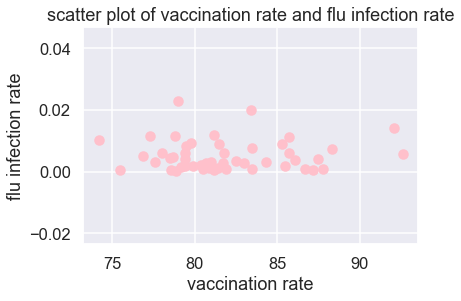

In [63]:
plt.title('scatter plot of vaccination rate and flu infection rate')
plt.xlabel('vaccination rate')
plt.ylabel('flu infection rate')
plt.scatter(x,y,c='pink')
# Here presents line graph of vaccination rate and flu infection rate
# X_axis is the vaccination rate
# y_axis is the flu infection rate

### Thoughts
- However, based on these two graphs, we do not see the correlation between these factors.

### step2: Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c275f2b90>,
      dtype=object)

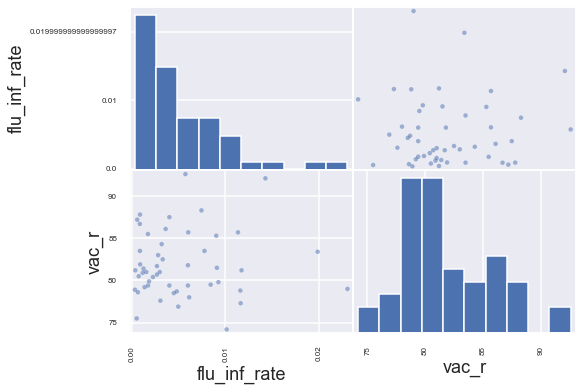

In [64]:
pd.plotting.scatter_matrix(flu_vac,figsize=(8,6))

### Thoughts
- From the plot matrix, we can see that the distrubution of 'flu_inf_rate' and 'vac_r' looks like a right skewed distribution.

### step3 : Basic Analysis

In [65]:
flu_vac.describe()

,flu_inf_rate,vac_r
count,50.000000,50.000000
mean,0.005225,81.890000
std,0.004994,3.918207
min,0.000349,74.200000
25%,0.001430,79.250000
50%,0.003470,81.100000
75%,0.007693,84.100000
max,0.023032,92.600000


This box graph can help us understand the description of the dataframe more directly.

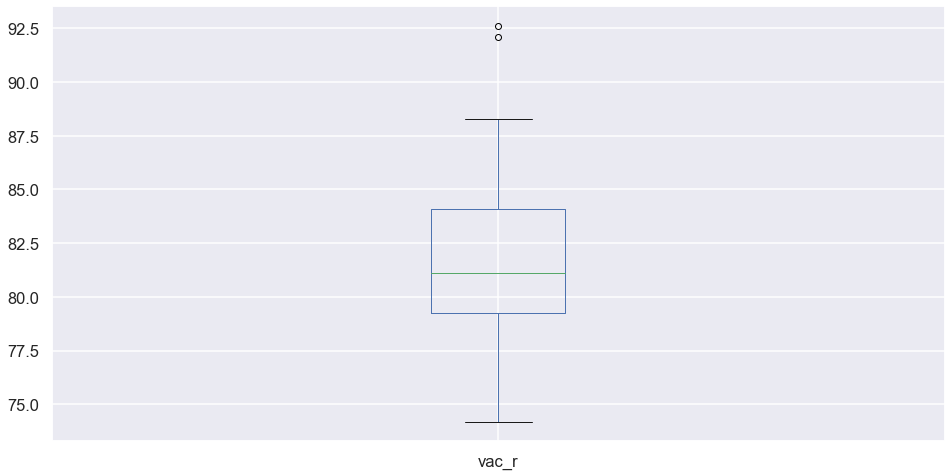

In [66]:
flu_vac['vac_r'].plot(kind='box', figsize=[16,8])

In [67]:
corrs=flu_vac.corr()
corrs

,flu_inf_rate,vac_r
flu_inf_rate,1.000000,0.031253
vac_r,0.031253,1.000000


From the correlation dataframe showing above, we cannot determine whether there is a correlation between the 'flu_inf_rate' and 'vac_r' since 0.031253 is kind of small. Therefore, we need to explore more about the correlation between these two factors.

### step4: Test Distribution

In [68]:
vr=flu_vac['vac_r']

In [69]:
st_co = normaltest(vr)[0]
p_co = normaltest(vr)[1]
st_co,p_co

(5.635230304342233, 0.05974826345119981)

By looking at the values returned, and using an alpha significance value of 0.01:
Set boolean values of whether each distribution can be considered to be normally distributed. In the result we get above, we could see that 'vr' failed to reject null, so it is true that it is a normal distribution.

Text(0, 0.5, 'density')

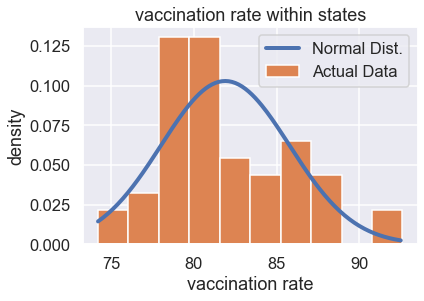

In [70]:
xs = np.arange(vr.min(), vr.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(vr), np.std(vr))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(vr, density = True, label = 'Actual Data');
plt.title('vaccination rate within states')
plt.legend();
plt.xlabel('vaccination rate')
plt.ylabel('density')

The graph above proved that we proposed in part2 that the 'vac_r' column is normally distributed. 

### step5: Prediction

Based on what we found (in step1, we see that there is a linear relationship between 'flu_inf_rate' and 'vac_r'), we could build a model to predict the data that we do not have. 

In [71]:
a1,b1 = np.polyfit(flu_vac['vac_r'], flu_vac['flu_inf_rate'], 1)
a1,b1

(3.983078244367091e-05, 0.0019633558444798974)

Based on the linear model we established, we could predict the vaccination rate by the infection rate. 

In [72]:
pred_2=a1 * 100 + b1
pred_2

0.005946434088846988

In [73]:
flu_vac.describe()

,flu_inf_rate,vac_r
count,50.000000,50.000000
mean,0.005225,81.890000
std,0.004994,3.918207
min,0.000349,74.200000
25%,0.001430,79.250000
50%,0.003470,81.100000
75%,0.007693,84.100000
max,0.023032,92.600000


If everyone could bet vaccine for flu, look at what we predict, the flu infection rate is very very close the min value that we have. 

In [74]:
pred_ary = []
for i in np.arange(74,93,0.05):
    pred_ary.append(a1 * i + b1)
pred_2 = np.array(pred_ary)

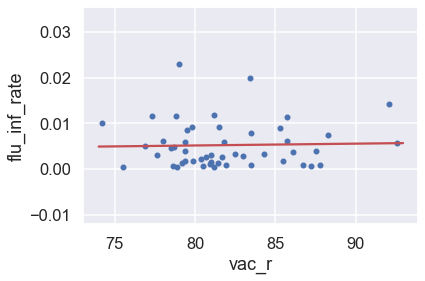

In [75]:
flu_vac.plot.scatter(x='vac_r',y='flu_inf_rate',color='b')
plt.plot(np.arange(74,93,0.05),pred_2,'r')



### step6: Data Analysis

From the linear regression model we established

In [76]:
outcome_2, predictors_2 = patsy.dmatrices('flu_inf_rate ~ vac_r', flu_vac)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:           flu_inf_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04693
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.829
Time:                        16:20:00   Log-Likelihood:                 194.56
No. Observations:                  50   AIC:                            -385.1
Df Residuals:                      48   BIC:                            -381.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.015      0.130      0.8

### step7: Conclusion
- From all the analysis above, we could conclude that there is a correlation between the flu infection rate and influenza vaccination rate. So how did we get the conclusion? In step3, after we get the description of each column, we tried to find their correlation. It shows that there is a correlation, but we want to make a further step. In step6, we established a linear regression model to prove our thought: set p value = 0.01. Since p value of vaccination rate is larger than 0.01, there is no linear relationship betweeen vaccination rate and influenza infection rate.

# 3. Is there a correlation between vaccination rate and each state’s medical level?

### processing
- In order to find the correlation between flu infection rate and the vaccination level of the states, we would like to consider the vaccination rate in all the states, avg hospital ratings, avg hospital servings in each state.
- We would like to create a new data frame that integrates data from vaccination rate and hospital rating data frames.
- In this case, the new data frame will be created with new columns
    - vac=vaccinationRate
    - serving= TOTAL PATIENTS/ Number of hospitals
    - score= Average hospital overall rating

In [77]:
vr_ml=pd.DataFrame()
vr_ml['vac']=df_vacc['vaccinationRate']
vr_ml['serving']=flu_ml['serving']
vr_ml['score']=flu_ml['score']

In [78]:
vr_ml

,vac,serving,score
0,74.2,20594.453608,3.039474
1,75.5,9132.038462,3.400000
2,76.9,8854.553191,3.072727
3,77.3,2085.686047,2.806452
4,77.6,5857.370757,2.993031
5,78.0,22914.571429,3.900000
6,78.5,5203.000000,2.964286
7,78.6,8719.333333,2.666667
8,78.7,77739.777778,1.833333
9,78.8,27670.129252,2.910891


We can see that there is a NA in the last row, so we need to drop it.

In [79]:
vr_ml = vr_ml.dropna()

In [80]:
vr_ml

,vac,serving,score
0,74.2,20594.453608,3.039474
1,75.5,9132.038462,3.400000
2,76.9,8854.553191,3.072727
3,77.3,2085.686047,2.806452
4,77.6,5857.370757,2.993031
5,78.0,22914.571429,3.900000
6,78.5,5203.000000,2.964286
7,78.6,8719.333333,2.666667
8,78.7,77739.777778,1.833333
9,78.8,27670.129252,2.910891


### goal:
- Based on 'serving', 'vac', and 'score', we want to try our best avoiding bias to analysis the correlation between vaccination rate and each state’s medical level

### step1: Data Visualization

#### try1: line graph

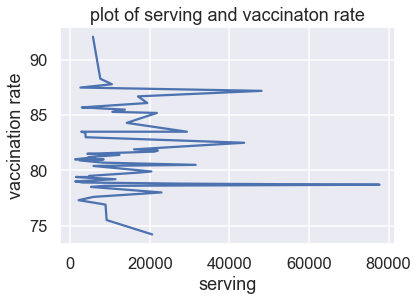

In [81]:
f_VaccAMed1 = plt.figure()
y=vr_ml['vac']
x1=vr_ml['serving']
x2=vr_ml['score']
plt.title('plot of serving and vaccinaton rate')
plt.xlabel('serving')
plt.ylabel('vaccination rate')
plt.plot(x1,y)
# Here presents line graph of vaccination rate and the number of patients serving per hospital')
# X_axis is the rate of vaccination rate
# y_axis is the the number of patients serving per hospital.

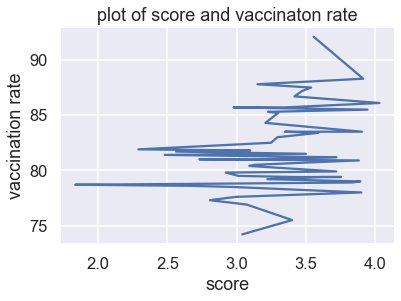

In [82]:
f_VaccAMed2 = plt.figure()
plt.title('plot of score and vaccinaton rate')
plt.xlabel('score')
plt.ylabel('vaccination rate')
plt.plot(x2,y)
# Here presents line graph of flu infection rate and the avg score of overall hospital
# X_axis is the rate of vaccination rate
# y_axis is the avg score of overall hospital.

- Thoughts

However, based on line graph, we cannot really see the correlation between these factore. What we can see from the graphs above are that when the hospital is serving less patients, the vaccination of the state is approximately higher However, this trend on the graph is very weak, and needs more studies. Also, when the hospital rating is higher, the vaccination rate is approximately higher as well with a lot of variances. From this first step, we set up our initial believe that the less per hospital serving and the higher the hospital rating score are, the more the state's vaccination rate is.
- However, we need further explorations.

#### try2: scatter plot

Text(0, 0.5, 'vaccination rate')

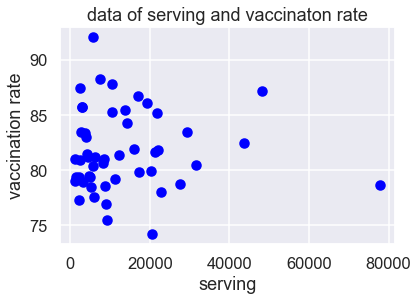

In [83]:
y=vr_ml['vac']
x1=vr_ml['serving']
x2=vr_ml['score']
# Plot the first set of data
f3=plt.scatter(x1, y, c='blue')
plt.title('data of serving and vaccinaton rate')
plt.xlabel('serving')
plt.ylabel('vaccination rate')
# Here presents scatter plot of vaccination rate and the number of patients serving per hospital')
# y_axis is the rate of vaccination
# x_axis is the the number of patients serving per hospital.

Text(0, 0.5, 'vaccination rate')

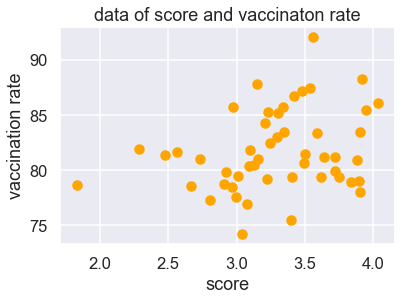

In [84]:
f4=plt.scatter(x2, y, c='orange')
plt.title('data of score and vaccinaton rate')
plt.xlabel('score')
plt.ylabel('vaccination rate')
# Here presents scatter plot of vaccination rate and the avg score of overall hospital
# y_axis is the rate of vaccination
# x_axis is the avg score of overall hospital.

- Thoughts

From the scatter plot of flu infection rate and the number of patients serving per hospital, we can guess there exists a positive linear relationship between the hospital rating scores and the vaccination rate, and a negative linear relationship between the hospital servings and the vaccination rate. However, using scatter plot, we could more easily see that where the point are more clustered. in the f3, we could see that higher vaccination rates corresponds to lower hospital servings. But still, the negative linear relationship between the serving and the vaccination rate is not obvious enough. In the f4, we can more clearly to see that as the hospital rating scores increase, the vaccination rates increase as well. The result we get is the same as the first try, our direction is in the right way.

### step2: Distribution

In this step, we want to check what kind of probability distribution our data sample appears to follow. Therefore, we might could set function on our dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27f90fd0>,
      dtype=object)

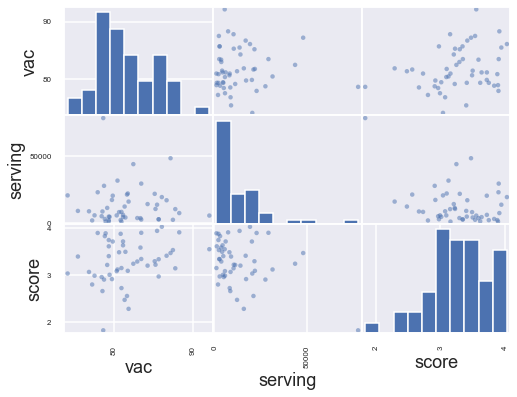

In [85]:
pd.plotting.scatter_matrix(vr_ml,figsize=(8,6))

- Thoughts

From the plot matrix, we can see that the distribution of 'vac' and'serving' looks like normal distribution and 'vac' and 'score' is more likely to be left skewed distribution.

### Step3 : Basic Analysis

In [86]:
# Use the describe pandas method to check a descriptive summary of the data.
vr_ml.describe()

,vac,serving,score
count,50.000000,50.000000,50.000000
mean,81.742000,13201.107986,3.283658
std,3.634926,14162.634689,0.462512
min,74.200000,1222.317073,1.833333
25%,79.250000,3969.047682,3.019362
50%,81.100000,8555.642157,3.297059
75%,84.100000,18822.959767,3.610099
max,92.100000,77739.777778,4.031250


The box plots above could help us to see the describe of the dataframe more directly.

Text(0.5, 1.0, 'Boxplot of vaccinaton rate')

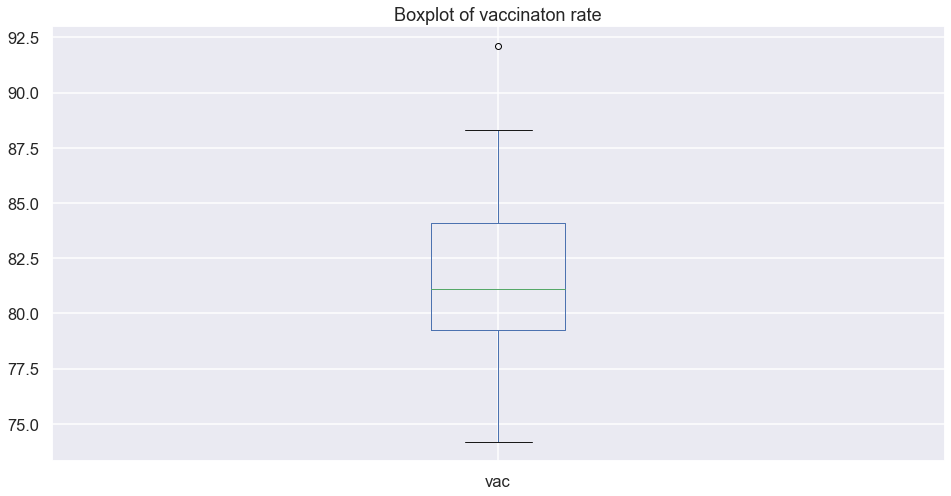

In [87]:
vr_ml['vac'].plot(kind='box', figsize=[16,8])
plt.title('Boxplot of vaccinaton rate')

Text(0.5, 1.0, 'Boxplot of score')

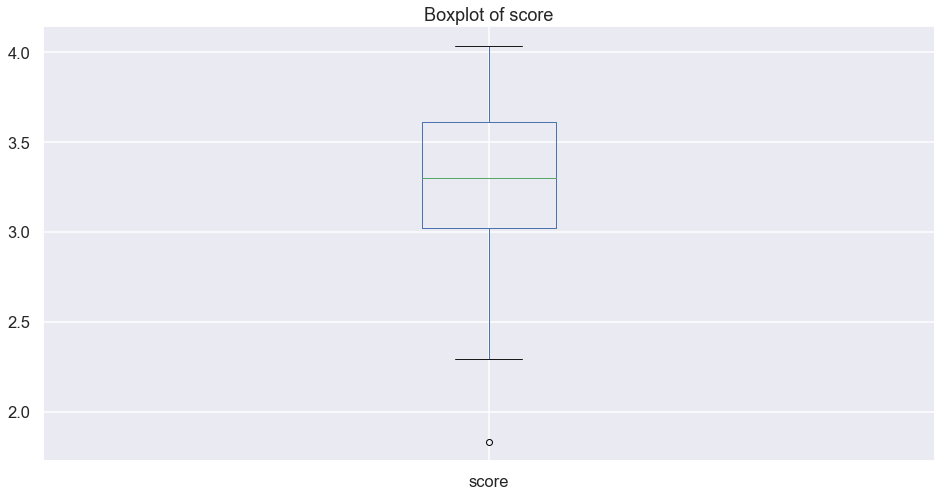

In [88]:
vr_ml['score'].plot(kind='box', figsize=[16,8])
plt.title('Boxplot of score')

Text(0.5, 1.0, 'Boxplot of serving')

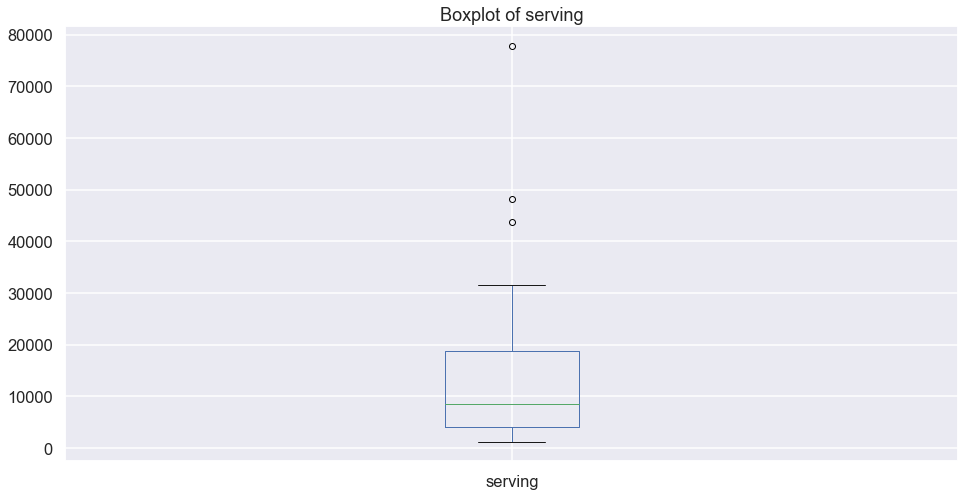

In [89]:
vr_ml['serving'].plot(kind='box', figsize=[16,8])
plt.title('Boxplot of serving')

In [90]:
corrs=vr_ml.corr()
corrs

,vac,serving,score
vac,1.000000,-0.004235,0.269674
serving,-0.004235,1.000000,-0.344729
score,0.269674,-0.344729,1.000000


 - From the correlation dataframe showing above, we can see that those factors are correlated to each other but not in a very impressive manner. The number of patients serving per hospital with states has a very week negative correlation with the vaccination rate; but the correlation between avg hospital rating scores and the vaccination rate is relatively strong. In this case, we can proposed that the avg hospital rating scores, the higher the vaccination is. 

### step4: Test Distribution

In [91]:
avg_score=vr_ml['score'].values

In [92]:
st_co = normaltest(avg_score)[0]
p_co = normaltest(avg_score)[1]
st_co,p_co

(5.6425191481670876, 0.05953091187164692)

Have a look at the values returned. 

Based on these results, and using an alpha significance value of 0.01:

Set boolean values (`True`, `False`) of whether each distribution can be considered to be normally distributed. In the result we get above, we could see that avg_score failed to reject null, so it's true that it is a normally distributed.

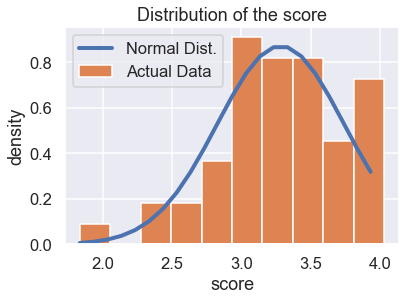

In [93]:
xs = np.arange(avg_score.min(), avg_score.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(avg_score), np.std(avg_score))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.title('Distribution of the score')
plt.ylabel('density')
plt.xlabel('score')
plt.hist(avg_score, density = True, label = 'Actual Data');
plt.legend();

The graph above proved that we proposed in part2 that the 'score' colomn is normally distributed.

Let's take a look at the distribution rate of the vaccination rate.

In [94]:
avg_vac=vr_ml['vac'].values

In [95]:
st_co = normaltest(avg_vac)[0]
p_co = normaltest(avg_vac)[1]
st_co,p_co

(2.8914613534513194, 0.2355738853002909)

Have a look at the values returned. 

Based on these results, and using an alpha significance value of 0.01:

Set boolean values (`True`, `False`) of whether each distribution can be considered to be normally distributed. In the result we get above, we could see that avg_score failed to reject null, so it's true that it is a normally distributed.

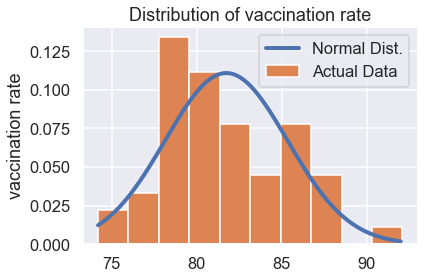

In [96]:
xs = np.arange(avg_vac.min(), avg_vac.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(avg_vac), np.std(avg_vac))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.title('Distribution of vaccination rate')
plt.ylabel('vaccination rate')
plt.hist(avg_vac, density = True, label = 'Actual Data');
plt.legend();

The graph above proved that we proposed in part2 that the 'vac' colomn is normally distributed.

### step5: Prediction

Based on what we found (in step1, we see that there's linear relationship between 'vac' and 'score'), we could like to build a model to predict the data that we don't have.

In [97]:
a1,b1 = np.polyfit(vr_ml['score'], vr_ml['vac'], 1)
a1,b1

(2.1193966839489966, 74.782625937541)

Based on the linear model we established, we could like to predict the vaccination rate if the hospital rating score is 4.

In [98]:
pred_=a1 * 4 + b1
pred_

83.26021267333698

Now, we want to see if this model match our dataset.

In [99]:
pred_ary = []
for i in np.arange(0.0001,5,0.0002):
    pred_ary.append(a1 * i + b1)
pred_2 = np.array(pred_ary)

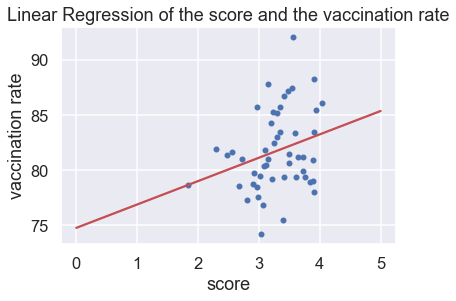

In [100]:
vr_ml.plot.scatter(x='score',y='vac',color='b')
plt.title('Linear Regression of the score and the vaccination rate')
plt.ylabel('vaccination rate')
plt.xlabel('score')
plt.plot(np.arange(0.0001,5,0.0002),pred_2,'r')

After making prediction for our x-values using linear model, we use R2 evaluation metric to test the accuracy of our linear model. As R2 approaches 1, it means the relationship between the predicting variable and responding variable gets stronger.

In [101]:
from sklearn.metrics import r2_score

In [102]:
arr = []
for i in vr_ml['score'].values:
    arr.append(a1*i+b1)
r2 = r2_score(vr_ml['vac'], arr)

In [103]:
r2

0.07272417472155601

As a result, we get R2 score of 0.0727. In this case, the relationship of 'score' and 'vac' is not strong enough.

### step6: Data Analysis
- From the linear regession model we established

In [104]:
outcome_3, predictors_3 = patsy.dmatrices('vac ~ serving+score', vr_ml)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

In [105]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    vac   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.090
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.135
Time:                        16:20:05   Log-Likelihood:                -132.84
No. Observations:                  50   AIC:                             271.7
Df Residuals:                      47   BIC:                             277.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.5456      4.076     18.045      0.0

### Conclusion:

- From all we analyzed above, we could get our conclusion for correlation between the vaccination rate and medical leve. We first choose two factors to present medical level in case of bias -- 'serving' and 'score' (explained above). In the beginning, we believe that score is more important to scale medical level. As we analysis further, we confirmed our hypothesis that 'score' is a more important factor and more related to 'vac'. How we get this conclusion? First, in the step2: Distribution, we figured out that score is distributed as two other factors. Then in the the correlation analysis step3, we get the correlation score of 'score' and 'vac' is 0.269674, while it is -0.004235 between 'serving' and 'vac'. Based on this thoughts, we would like to step further. In step6, we established linear regression model to prove our thought: set p value =0.05. Since the p value of serving is larger than 0.05, there is no linear relationship between serving and vaccination rate. At the same time, since the p value of scoring is smaller thann 0.05, there is a positive relationship between score and vaccination rate.

# 4. Correlation between Temperature and influenza vaccination rate

Goal : We want to find the relation between temperature and flu infection rate

### step:1 Test Distribution

In [106]:
a = df_temp.mean(axis=1)
st_tp,p_tp=normaltest(a)
p_tp

0.2592835002884174

From the value returned, we can see that p value is about 0.25, which is bigger than 0.01

So we can tell by that it is a normal distribution.

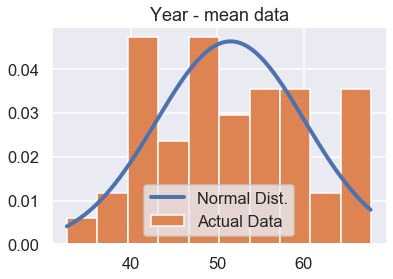

In [107]:
xs = np.arange(a.min(), a.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(a), np.std(a))

plt.plot(xs, fit ,label = 'Normal Dist.', lw = 4)
plt.hist(a, density = True, label = 'Actual Data')
plt.title("Year - mean data")
plt.legend()

Since the p-value is greater than 0.01, it fails to reject null. Thus, this dataset is normal distributed.

Let's take a look at the distribution rate of flu infected rate with temperature

### step 2: Prediction

We put two datasets together to better predict the relation.

In [108]:
df_temp_ili = df_annually1
df_temp_ili['Temperature'] = df_year_temp['Temperature']
df_temp_ili

,ILIRATE,Temperature
State,,
Alabama,0.028818,65.033333
Alaska,0.031318,32.608333
Arizona,0.026634,60.058333
Arkansas,0.029654,61.200000
California,0.021014,58.558333
Colorado,0.032616,45.241667
Connecticut,0.032159,49.975000
Delaware,0.005620,57.683333
Georgia,0.030618,65.991667


We are putting the data into scatterplot to analyze.
- x axis is mean temperature of each state
- y axis is the rate of flu infected of each state

Text(0, 0.5, 'Influenza infection rate')

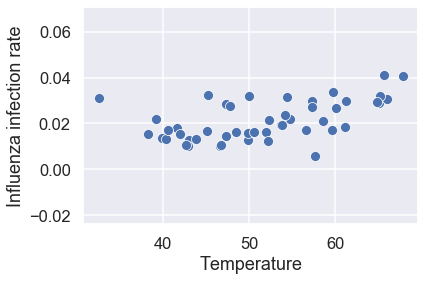

In [109]:
sns.scatterplot(x='Temperature', y='ILIRATE', data=df_temp_ili, s=100)
plt.xlabel('Temperature')
plt.ylabel('Influenza infection rate')

### step 3: Data Analysis

In [110]:
outcome, predictors = patsy.dmatrices('ILIRATE ~ Temperature', df_temp_ili)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                ILIRATE   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     16.87
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           0.000163
Time:                        16:20:06   Log-Likelihood:                 168.19
No. Observations:                  48   AIC:                            -332.4
Df Residuals:                      46   BIC:                            -328.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0051      0.007     -0.789      

P value = 0.000 which is smaller than 0.01, so reject null. We get the linear regression as following

$$ Infectionrate= -0.0051+0.0005*Temperature $$

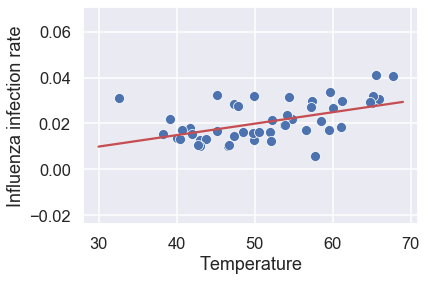

In [111]:
sns.scatterplot(x='Temperature', y='ILIRATE', data=df_temp_ili, s=100)
plt.xlabel('Temperature')
plt.ylabel('Influenza infection rate')
a1=0.0005
b1=-0.0051
x1=np.arange(30,70,1)
pred_infect_tem=x1*a1+b1
plt.plot(x1,pred_infect_tem,c='r')

### Step 4: Conclusion

- From all we analyzed above, we could get our conclusion for relation between temperature and flu infection rate. We first test if there exist normal distribution of mean temperature for each state in US. For further analysis, we create linear regression model to back up our thought. we set p value= 0.01. Since p value for temperature is smaller than 0.01, there is a positive relationship between temperature and influenza infection rate.

# Part3：Ethics

Our project is aimed to provide some suggestions to lower the flu infection rate. We consider ethic aspect when we ask questions. Our research questions are not biased, since we do not ask question about any private information of people or intend to find out information to favor any group of people.

Our project’s stakeholders are people in the United States. Since we are analyzing in three factors avoiding the result biased on some groups of people (we do not compare people abased on their gender or race), our result will not favor or deteriorate  any group of people. 

For the privacy concern, our datasets do not include any patient names, phone, emails or other things that contain patients’ private information. We do research on the numerical relation between each dataset to test our hypothesis. The datasets we use are free for all people to access online on the official organizations websites. The first, our datasets contain the data from number of patients of have flu from CDC, which is a medical official organization in the United States. This data is about the number of how many flu patients records. It does not have the bias problems since it include information of all patients in American. Second, dataset of each state’s vaccination rate is from the official national organization and it is free for all people to access, and this dataset did not include any privacy data about patients. Third, the temperature data are collected by each state, which did not have any privacy information about people.

At the same time, we carefully avoid ethical problem during data analysis. The process of analysis is mainly based on statistical result by using linear regression model. Therefore, no ethical and privacy issues appear.

One minor concern is that we analyze the relationship between vaccination rate and influenza infection rate, and make suggestion based on our result. However, we do not consider the ethical problems related to vaccine usages. So our analysis may cause ethical problem in a larger picture. 

# Part4: Conclusion and Discussion

In this project, we aim to find out the relationships between influenza infection rate and three factors - state’s medical level, vaccination rate, and temperature. We intend help the public to have better understanding about influenza infection rate and therefore protect themselves. 

In the beginning, we find datasets about infection rate and three factors. We standardize datasets so that each row represents one state, and the columns represent factors. Then, we drop Nan values for the selected features, and only keep data for 2018 to 2019. With the clean datasets, we visualize our data, and use OLS to find out the relationships. To specify, we evaluate each state’s medical level by two dimensions (1. Average rate of hospitals 2. Patient serving number), and find out that there is a positive linear relationship between vaccination rate and hospital scoring. 

We predict influenza infection rate is negatively correlated to those factors. However, our project’s results do not match our prediction. As our data shows, the influenza infection rate is positively related to temperature, but not related to other two factors (medical level and vaccination rate). Although there is a positive linear relationship between influenza infection rate and patients serving number, the ß value (2.58e-07) is really small, which means the relationship is weak. 

Our results warn the public to rethink the correlation between virus and temperature. Many people misbelieve the there exist a negative correlation between virus infection rate and temperature. In other words, they expect viruses’ infection ability get weaker when weather warms up. However, our research shows that the negative correlation is not always true. At the same time, our result should not be used to against vaccine. Although we do not find the negative correlation between influenza infection rate and vaccination rate, our analysis also do not find the positive correlation. Last but not least, the project results do not discourage the investment on local hospitals. Although there is no negative correlation between influenza infection rate and medical level, our project does not analysis other types of disease. It is possible that the better hospitals are, the lower infection rate among patient in hospital.

Admittedly, our project has several limitations which may influence our result. One limitation of our analysis is that we do not analyze influenza infection rate by influenza virus type. It is possible that some types of virus can survive better in cold temperature, but some do not. The second limitation is that we do not consider one important factor: age. For example, it is possible that some states with larger aging population have higher influenza infection rate. The third limitation is that we chose to analysis data for 2018 to 2019. If we have more time, we should find datasets which include relative data for several years. Once we analysis several years data, we can get more precise results.


# Part 5 Team Contribution

Individual's main focus:
- Xiaolong Huang: finding appropriate data source, write code to wrangle, and explore.(mainly work on part2.2)
- Yueqi Liao: code to explore and visualize. (mainly work on part2.3)
- Zehua Fu: code to visualize and analyze. (mainly work on part2.4)
- Yi Mao: Introduction and conclusion.(linear regression code)
- Shuyuan Wang: code to analyze and communication. (mainly work on part2.1)